In [1]:
import sklearn
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install scikit-learn==1.3.0

In [3]:
df = pd.read_csv('iris.csv.zip')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

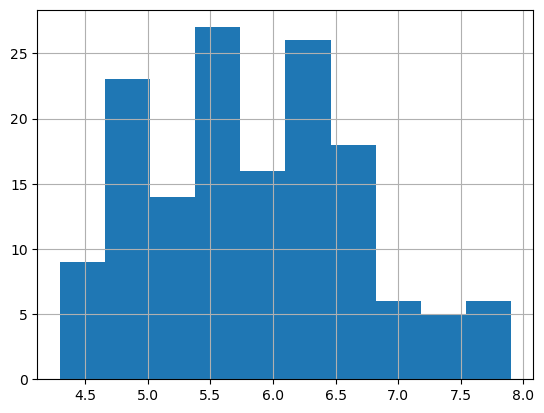

In [8]:
df['sepal_length'].hist()

<Axes: >

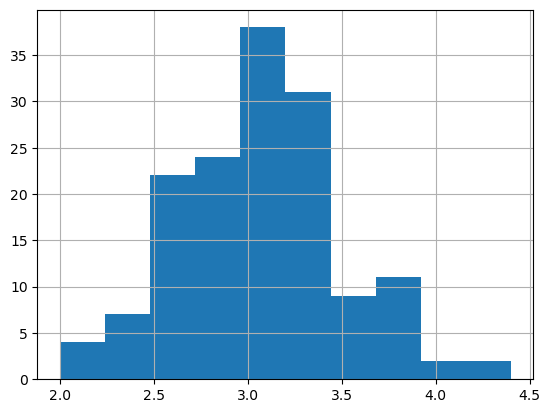

In [9]:
df['sepal_width'].hist()

<Axes: >

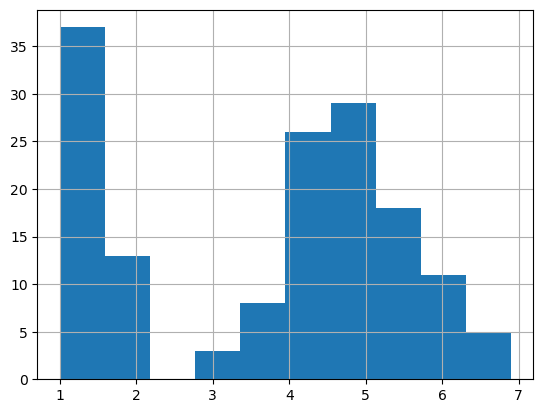

In [10]:
df['petal_length'].hist()

<Axes: >

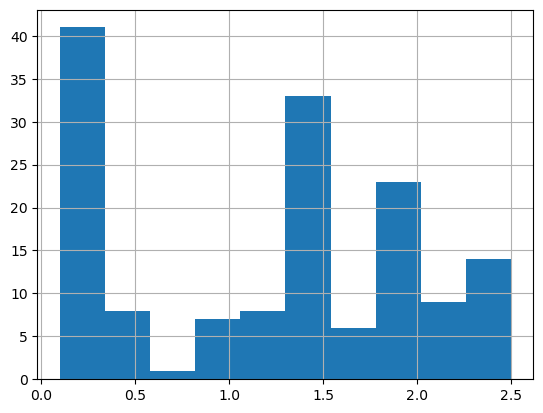

In [11]:
df['petal_width'].hist()

In [12]:
colors = ['grey','black','violet']
species = ['virginica','versicolor','setosa'] 

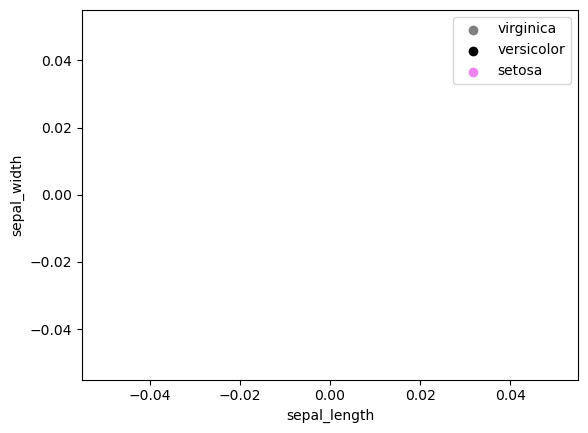

In [13]:
import matplotlib.pyplot as plt
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])

plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.legend()
plt.show()  # Display the plot


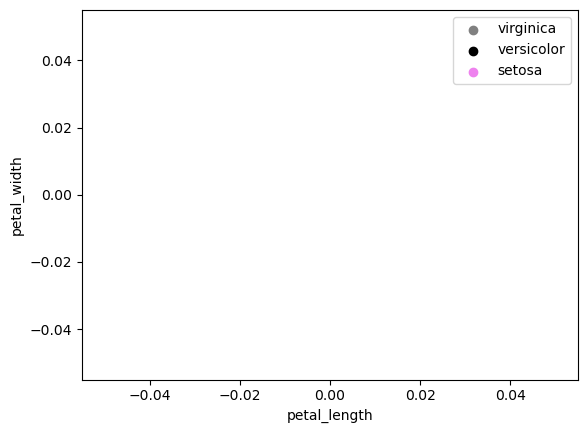

In [14]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c=colors[i], label=species[i])

plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.legend()
plt.show()  # Display the plot


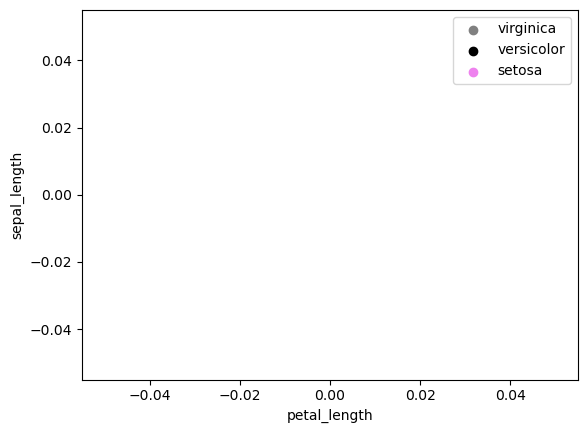

In [15]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['sepal_length'], c=colors[i], label=species[i])

plt.xlabel("petal_length")
plt.ylabel("sepal_length")
plt.legend()
plt.show()  # Display the plot


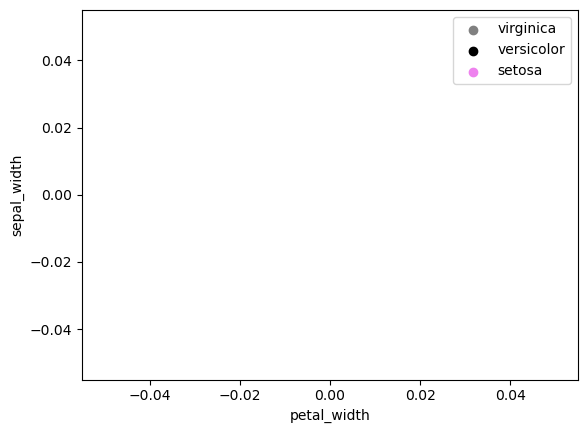

In [16]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_width'], x['sepal_width'], c=colors[i], label=species[i])

plt.xlabel("petal_width")
plt.ylabel("sepal_width")
plt.legend()
plt.show()  # Display the plot


In [17]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

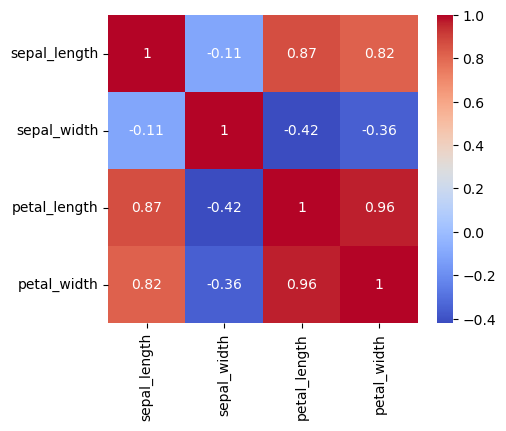

In [18]:
corr = df.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle
X =df.drop(columns=['species'])
Y =df['species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)
model=LogisticRegression()
model.fit(x_train,y_train)
print("Logistic Regression Accuracy:",model.score(x_test,y_test)*100)


Logistic Regression Accuracy: 95.55555555555556


In [20]:
model.fit(x_train.values,y_train.values)

LogisticRegression()

In [21]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 95.55555555555556


In [22]:
model= KNeighborsClassifier()
model.fit(x_train.values,y_train.values)
print("K-nearest neighbors Accuracy:",model.score(x_test,y_test)*100)


K-nearest neighbors Accuracy: 93.33333333333333


In [23]:
model.fit(x_train.values,y_train.values)

KNeighborsClassifier()

In [24]:
print("Accuracy:",model.score(x_test,y_test)*100)


Accuracy: 93.33333333333333


In [25]:
model= DecisionTreeClassifier()
model.fit(x_train.values,y_train.values)
print("Decision Tree Accuracy:",model.score(x_test,y_test)*100)


Decision Tree Accuracy: 95.55555555555556


In [26]:
model.fit(x_train.values,y_train.values)

DecisionTreeClassifier()

In [27]:
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 91.11111111111111


In [28]:
import pickle
filename='saved_model.sav'
try:
    with open(filename,'wb')as file:
        pickle.dump(model,file)
        print("model saved successfully")
except exception as e:
            print(f"Error saving the model:{e}")

model saved successfully


In [29]:
load_model =pickle.load(open(filename,'rb'))

In [30]:
load_model.predict([[6.0,2.2,4.0,1.0]])

array(['Iris-versicolor'], dtype=object)

In [31]:
import sklearn
print(sklearn.__version__)

1.3.0


In [32]:
load_model.predict([[1,2,3,4]])

array(['Iris-virginica'], dtype=object)